## Step 0: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Step 1: Importing Data

In [2]:
imdb = keras.datasets.imdb

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
X_train.shape,X_test.shape

((25000,), (25000,))

In [5]:
np.unique(y_train) #for checking the unique labels

array([0, 1], dtype=int64)

In [6]:
print("Number of words: ")
print(len(np.unique(np.hstack(X_train))))

Number of words: 
9998


## Step 2: Data Preprocessing

### Step 2.1: Data Visualization

Mean is 238.71364


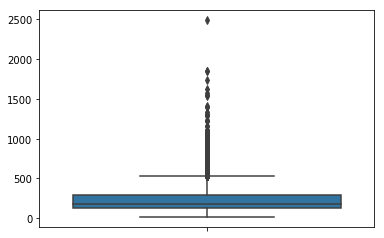

In [7]:
# Visualizing the Dataset

result = [len(x) for x in X_train]
sns.boxplot(y=result)
print("Mean is", np.mean(result))

In [9]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Data is already preprocessed i.e. the words are already converted into numbers.

### Step 2.2 Visualizing the Actual Review from preprocessed dataset

In [10]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
reverse_word_index = {y:x for x,y in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [13]:
def decode_review(encoded_review):
    decoded_review = []
    for word in encoded_review:
        #print(word)
        if word in reverse_word_index:
            decoded_review.append(reverse_word_index[word])
    return decoded_review

In [14]:
print(decode_review(X_train[0]))

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'musicians', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 

In [15]:
word_index = {x:(y+3) for x,y in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
reverse_word_index = {y:x for x,y in word_index.items()}

In [16]:
print(' '.join(decode_review(X_train[0])))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

### Step 2.3 Padding all Reviews to have equal length

In [17]:
from tensorflow.python.keras.preprocessing import sequence

In [18]:
max_review_length = 500
X_train_padded = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test_padded = sequence.pad_sequences(X_test, maxlen=max_review_length)

Mean is 500.0


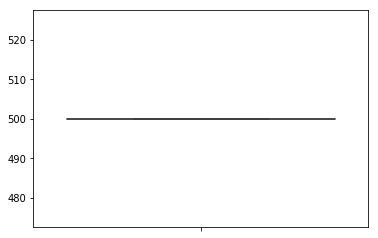

In [19]:
result = [len(x) for x in X_train_padded]
sns.boxplot(y=result)
print("Mean is", np.mean(result))

In [20]:
print(X_train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## Step 3: One Hot Encoding (optional)

In [21]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer(num_words=10000)
token_X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
token_X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(token_X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [23]:
token_X_train.shape, token_X_test.shape

((25000, 10000), (25000, 10000))

### Or we can just use the concept of Embedding Matrix. Because One Hot Encoding will create a matrix of dimensions 25000 * 10000 and most of values will be zeros. Dimensions are of the order Number_of_Reviews * Max_length

## Step 4: Modelling Data

In [24]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

### I have used the approach of Embedding Matrix Here

In [32]:
embedding_vector_length = 32

model = Sequential()

model.add(Embedding(10000, embedding_vector_length, input_length=max_review_length))

model.add(LSTM(100, return_sequences= True))

model.add(keras.layers.GlobalAveragePooling1D())

model.add(Flatten())

model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [34]:
model.fit(X_train_padded, y_train, epochs=3, batch_size=128, validation_split=0.1)

c:\users\kanwal\miniconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
c:\users\kanwal\miniconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 275s 12ms/step - loss: 0.6451 - acc: 0.6089 - val_loss: 0.4110 - val_acc: 0.8412
Epoch 2/3
22500/22500 [==============================] - 268s 12ms/step - loss: 0.3037 - acc: 0.8799 - val_loss: 0.3047 - val_acc: 0.8852
Epoch 3/3
22500/22500 [==============================] - 267s 12ms/step - loss: 0.2153 - acc: 0.9182 - val_loss: 0.3266 - val_acc: 0.8776


In [35]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 100)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 383,401
Trainable params: 383,401
Non-trainable params: 0
_________________________________________________________________
None

## Step 5: Saving Model

In [36]:
model.save_weights('sentiment_v1.h5')

## Step 6: Visualizing the Losses and Accuracy

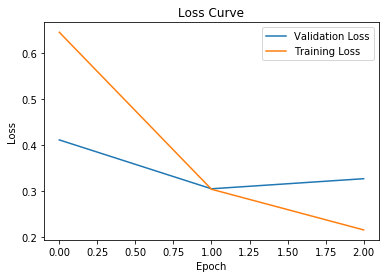

In [39]:
val_loss = model.history.history['val_loss']
tra_loss = model.history.history['loss']

plt.plot(val_loss)
plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

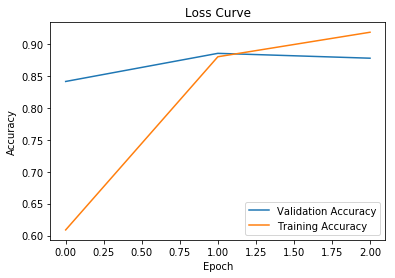

In [40]:
val_acc = model.history.history['val_acc']
tra_acc = model.history.history['acc']

plt.plot(val_acc)
plt.plot(tra_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss Curve')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
plt.show()

## Step 7: Testing Your Neural Network

In [41]:
scores = model.evaluate(X_test_padded, y_test, verbose=0)
print("Test Accuracy: " , (scores[1]*100))

Test Accuracy:  86.012


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
y_pred = model.predict(X_test_padded)

In [44]:
y_pred = (y_pred > 0.5).astype(int)

In [45]:
print(classification_report(y_test , y_pred))

             precision    recall  f1-score   support

          0       0.81      0.94      0.87     12500
          1       0.93      0.78      0.85     12500

avg / total       0.87      0.86      0.86     25000



In [46]:
print(confusion_matrix(y_test, y_pred))

[[11794   706]
 [ 2791  9709]]


In [47]:
print(X_test_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [48]:
print(' '.join(decode_review(X_test[0])))

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss


In [49]:
def ReturnSentiment(test):
    test_pred = model.predict(test.reshape(1,500))
    if(test_pred > 0.5):
        return 'Positive'
    else:
        return 'Negative'


In [50]:
ReturnSentiment(X_test_padded[0])

'Negative'

In [51]:
print(' '.join(decode_review(X_test[30])))

<START> tim robbins did a masterful job directing this film i say this because he avoided convention and cliché he also <UNK> superb performances from susan sarandon who won an oscar for her role and sean penn even more amazing robbins doesn't <UNK> he just tells the story and lets the events play on the viewer's mind this is so effective because it allows the viewer to form his own opinions on the death penalty one of the most controversial subjects of our time without being unfairly manipulated in either direction i can't recommend this film enough 9 10


In [52]:
ReturnSentiment(X_test_padded[30])

'Positive'